In [1]:
import sys, argparse
sys.path.append('..')
import helper
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics

In [2]:
pos_examples = [s.decode("utf-8", "ignore").strip() for s in list(open(helper.mr_pos_data, mode="rb").readlines())]
neg_examples = [s.decode("utf-8", "ignore").strip() for s in list(open(helper.mr_neg_data, mode="rb").readlines())]
pos_nums, neg_nums = len(pos_examples), len(neg_examples)
x = pos_examples + neg_examples
x = [helper.clean_str(sentence) for sentence in x]
pos_labels = [1 for _ in range(pos_nums)]
neg_labels = [0 for _ in range(neg_nums)]
y = pos_labels + neg_labels
x, y = np.array(x), np.array(y)
x_train, y_train, x_dev, y_dev = helper.split_train_dev(x, y)

In [3]:
tfidf = TfidfVectorizer(min_df=2, ngram_range=(1,2))
tfidf.fit(x_train)
x_train_tf = tfidf.transform(x_train)
x_dev_tf = tfidf.transform(x_dev)

In [37]:
x_train_tf.toarray().shape

(9596, 26705)

In [32]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
x_train_pca = pca.fit(x_train_tf.toarray()).transform(x_train_tf.toarray())

/home/gfaia/Applications/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


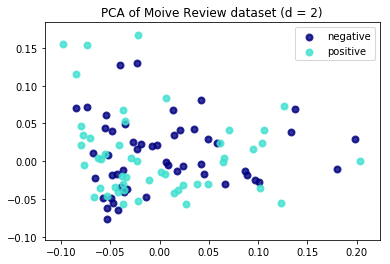

In [38]:
import matplotlib.pyplot as plt

x_pca, y_pca = x_train_pca[:100], y_train[:100]
plt.figure()
colors = ['navy', 'turquoise']
labels = ['negative', 'positive']

for color, i, label in zip(colors, [0, 1], labels):
    plt.scatter(x_pca[y_pca == i, 0], x_pca[y_pca == i, 1], color=color, alpha=.8, lw=2, label=label)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of Moive Review dataset (d = 2)')

In [ ]:
n_dims = [50, 100, 500, 1000]
for d in n_dims:
    pca = PCA(n_components=d)
    x_train_pca = pca.fit(x_train_tf.toarray()).transform(x_train_tf.toarray())
    x_dev_pca = pca.transform(y_)